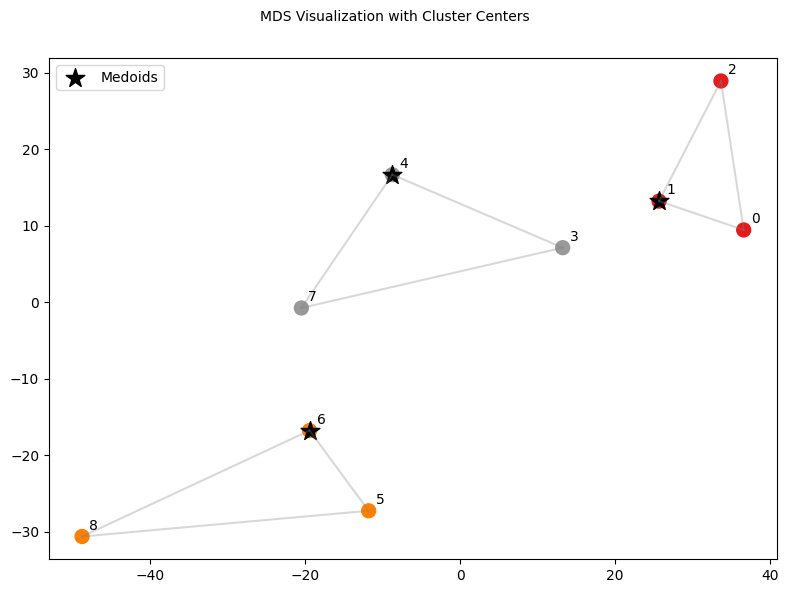


Cluster Medoids (most central points):
----------------------------------------
Cluster 1: Point 1
Average distance to cluster points: 8.33
Cluster members: [np.int64(0), np.int64(1), np.int64(2)]

Cluster 2: Point 6
Average distance to cluster points: 13.33
Cluster members: [np.int64(5), np.int64(6), np.int64(8)]

Cluster 3: Point 4
Average distance to cluster points: 17.00
Cluster members: [np.int64(3), np.int64(4), np.int64(7)]



In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Distance matrix data
M = [
    [0, 10, 24, 21, 45, 65, 60, 55, 100],
    [10, 0, 15, 11, 35, 55, 50, 48, 90],
    [24, 15, 0, 25, 50, 70, 75, 60, 100],
    [21, 11, 25, 0, 25, 45, 40, 35, 60],
    [45, 35, 50, 25, 0, 40, 30, 26, 70],
    [65, 55, 70, 45, 40, 0, 12, 30, 40],
    [60, 50, 75, 40, 30, 12, 0, 18, 28],
    [55, 48, 60, 35, 26, 30, 18, 0, 40],
    [100, 90, 100, 60, 70, 40, 28, 40, 0],
]
X = np.array(M)

# Cluster assignments
cluster_assignments = np.zeros(9, dtype=int)
cluster_assignments[[1, 0, 2]] = 0  # C1
cluster_assignments[[6, 5, 8]] = 1  # C2
cluster_assignments[[4, 3, 7]] = 2  # C3

def find_cluster_centers(points, cluster_labels, distance_matrix):
    medoids = {}
    
    for cluster_id in np.unique(cluster_labels):
        # Get points in this cluster
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        
        # Find medoid (point with minimum average distance to other points in cluster)
        min_avg_dist = float('inf')
        medoid_idx = None
        
        for i in cluster_indices:
            avg_dist = np.mean([distance_matrix[i][j] for j in cluster_indices])
            if avg_dist < min_avg_dist:
                min_avg_dist = avg_dist
                medoid_idx = i
                
        medoids[cluster_id] = (medoid_idx, points[medoid_idx])
    
    return medoids

plt.figure(figsize=(8, 6))
plt.suptitle('MDS Visualization with Cluster Centers\n', fontsize=10)

# MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0)
points_mds = mds.fit_transform(X)
medoids_mds = find_cluster_centers(points_mds, cluster_assignments, M)

# Plot points with cluster colors
scatter = plt.scatter(points_mds[:, 0], points_mds[:, 1],
                    c=cluster_assignments, cmap='Set1', s=100)

# Add point labels
for i in range(len(points_mds)):
    plt.annotate(str(i), (points_mds[i, 0], points_mds[i, 1]),
               xytext=(5, 5), textcoords='offset points')

# Draw lines between points in same cluster
for cluster_points in [[1, 0, 2], [6, 5, 8], [4, 3, 7]]:
    for i in range(len(cluster_points)):
        for j in range(i + 1, len(cluster_points)):
            p1, p2 = cluster_points[i], cluster_points[j]
            plt.plot([points_mds[p1, 0], points_mds[p2, 0]],
                   [points_mds[p1, 1], points_mds[p2, 1]],
                   'gray', alpha=0.3)

# Plot medoids
for cluster_id, (_, medoid_point) in medoids_mds.items():
    plt.scatter(medoid_point[0], medoid_point[1], c='black', marker='*', s=200,
              label='Medoids' if cluster_id == 0 else "")

plt.legend()
plt.tight_layout()
plt.show()

# Print medoids for each cluster
print("\nCluster Medoids (most central points):")
print("-" * 40)
for cluster_id in range(3):
    medoid_idx = medoids_mds[cluster_id][0]
    print(f"Cluster {cluster_id + 1}: Point {medoid_idx}")
    
    # Print average distance to other points in cluster
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]
    avg_dist = np.mean([M[medoid_idx][j] for j in cluster_indices])
    print(f"Average distance to cluster points: {avg_dist:.2f}")
    print(f"Cluster members: {list(cluster_indices)}")
    print()

In [16]:
import numpy as np
from lib import new_matrixies_from_original
# Исходная матрица
M = [
    [0, 10, 24, 21, 45, 65, 60, 55, 100],
    [10, 0, 15, 11, 35, 55, 50, 48, 90],
    [24, 15, 0, 25, 50, 70, 75, 60, 100],
    [21, 11, 25, 0, 25, 45, 40, 35, 60],
    [45, 35, 50, 25, 0, 40, 30, 26, 70],
    [65, 55, 70, 45, 40, 0, 12, 30, 40],
    [60, 50, 75, 40, 30, 12, 0, 18, 28],
    [55, 48, 60, 35, 26, 30, 18, 0, 40],
    [100, 90, 100, 60, 70, 40, 28, 40, 0],
]

# Определение группы
## Находим упорядоченную матрицу, матрицу номеров и суммарную матрицу
_M, Mk, Mc = new_matrixies_from_original(M)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M))
print(np.array(Mk))
print(np.array(Mc))

[[  0   0   0   0   0   0   0   0   0]
 [ 10  10  15  11  25  12  12  18  28]
 [ 21  11  24  21  26  30  18  26  40]
 [ 24  15  25  25  30  40  28  30  40]
 [ 45  35  50  25  35  40  30  35  60]
 [ 55  48  60  35  40  45  40  40  70]
 [ 60  50  70  40  45  55  50  48  90]
 [ 65  55  75  45  50  65  60  55 100]
 [100  90 100  60  70  70  75  60 100]]
[[1 2 3 4 5 6 7 8 9]
 [2 1 2 2 4 7 6 7 7]
 [4 4 1 1 8 8 8 5 6]
 [3 3 4 3 7 5 9 6 8]
 [5 5 5 5 2 9 5 4 4]
 [8 8 8 8 6 4 4 9 5]
 [7 7 6 7 1 2 2 2 2]
 [6 6 7 6 3 1 1 1 1]
 [9 9 9 9 9 3 3 3 3]]
[[  0   0   0   0   0   0   0   0   0]
 [ 10  10  15  11  25  12  12  18  28]
 [ 31  21  39  32  51  42  30  44  68]
 [ 55  36  64  57  81  82  58  74 108]
 [100  71 114  82 116 122  88 109 168]
 [155 119 174 117 156 167 128 149 238]
 [215 169 244 157 201 222 178 197 328]
 [280 224 319 202 251 287 238 252 428]
 [380 314 419 262 321 357 313 312 528]]


In [ ]:
from lib import replace_rows_and_columns_from_matrix_by_indexes
indx_to_replace = [0, 1, 3]

M_1 = replace_rows_and_columns_from_matrix_by_indexes(M, indx_to_replace)
print(np.array(M_1))


_M_1, Mk_1, Mc_1 = new_matrixies_from_original(M_1)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk_1:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_1))
print(np.array(Mk_1))
print(np.array(Mc_1))

In [ ]:
indx_to_replace = [2, 3, 4]
print(np.array(M_1))

M_2 = replace_rows_and_columns_from_matrix_by_indexes(M_1, indx_to_replace)

print(np.array(M_2))

_M_2, Mk_2, Mc_2 = new_matrixies_from_original(M_2)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk_2:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_2))
print(np.array(Mk_2))
print(np.array(Mc_2))

In [ ]:
M_4 = [
    [0, 35, 50],
    [35, 0, 30],
    [50, 30, 0],
]
print(np.array(M_4))

_M_4, Mk_4, Mc_4 = new_matrixies_from_original(M_4)

# Обновим индексы, чтобы отсчет шел от 1 
for row in Mk_4:
    for j in range(len(row)):
        row[j] += 1

print(np.array(_M_4))
print(np.array(Mk_4))
print(np.array(Mc_4))

In [ ]:
import networkx as nx
import numpy as np

def create_graph_from_matrix(matrix: list[list[float]]) -> nx.Graph:
    """Creates a weighted graph from distance matrix"""
    G = nx.Graph()
    n = len(matrix)
    
    # Add nodes (0-based indexing)
    for i in range(n):
        G.add_node(i)
    
    # Add weighted edges
    for i in range(n):
        for j in range(i+1, n):
            if matrix[i][j] != 0:  # Assuming non-zero distances
                G.add_edge(i, j, weight=matrix[i][j])
    
    return G

def verify_solution(G: nx.Graph, groups: list[list[int]], level: int):
    """Verifies properties of the solution"""
    print(f"\nVerifying Level {level} Groups:")
    
    # Print the groups
    for i, group in enumerate(groups):
        print(f"G{i+1} = {group}")
        
        # Verify group size
        print(f"Group size: {len(group)} nodes")
        
        # Calculate total distance within group
        total_dist = 0
        for u in group:
            for v in group:
                if u < v:
                    try:
                        total_dist += G[u][v]['weight']
                    except KeyError:
                        pass
        print(f"Total intra-group distance: {total_dist}")
        
        # Calculate average distance to center
        # Assuming center is the node with minimum sum of distances to other nodes
        center = min(group, 
                    key=lambda x: sum(G[x][y]['weight'] 
                                    for y in group if y != x))
        avg_dist_to_center = np.mean([G[center][node]['weight'] 
                                    for node in group if node != center])
        print(f"Center node: {center}")
        print(f"Average distance to center: {avg_dist_to_center:.2f}")
        print()

M = [
    [0, 10, 24, 21, 45, 65, 60, 55, 100],
    [10, 0, 15, 11, 35, 55, 50, 48, 90],
    [24, 15, 0, 25, 50, 70, 75, 60, 100],
    [21, 11, 25, 0, 25, 45, 40, 35, 60],
    [45, 35, 50, 25, 0, 40, 30, 26, 70],
    [65, 55, 70, 45, 40, 0, 12, 30, 40],
    [60, 50, 75, 40, 30, 12, 0, 18, 28],
    [55, 48, 60, 35, 26, 30, 18, 0, 40],
    [100, 90, 100, 60, 70, 40, 28, 40, 0],
]

# Create graph from your matrix
G = create_graph_from_matrix(M)

# Verify your solution
level1_groups = [[1,0,2], [6,5,8], [4,3,7]]  # h=1
level2_groups = [[4,6,1]]                     # h=2

verify_solution(G, level1_groups, 1)
verify_solution(G, level2_groups, 2)

# Additional verification: check if groups are connected
def verify_connectivity(G: nx.Graph, groups: list[list[int]]):
    print("\nVerifying group connectivity:")
    for i, group in enumerate(groups):
        subgraph = G.subgraph(group)
        is_connected = nx.is_connected(subgraph)
        print(f"Group {i+1} is {'connected' if is_connected else 'not connected'}")

verify_connectivity(G, level1_groups)
verify_connectivity(G, level2_groups)

# Verify if the grouping satisfies capacity constraints
def verify_capacity_constraints(groups: list[list[int]], capacity: int):
    print(f"\nVerifying capacity constraints (max={capacity}):")
    for i, group in enumerate(groups):
        satisfies = len(group) <= capacity
        print(f"Group {i+1}: size={len(group)} {'✓' if satisfies else '✗'}")

verify_capacity_constraints(level1_groups, 3)  # Assuming capacity constraint of 3
verify_capacity_constraints(level2_groups, 3)

In [ ]:
import matplotlib.pyplot as plt

def visualize_solution(G: nx.Graph, groups: list[list[int]], level: int):
    plt.figure(figsize=(10, 8))
    pos = nx.circular_layout(G)
    
    # Draw the full graph
    nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    # Draw each group with different colors
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, group in enumerate(groups):
        nx.draw_networkx_nodes(G, pos, nodelist=group, 
                             node_color=colors[i % len(colors)], 
                             node_size=500)
        nx.draw_networkx_labels(G, pos)
    
    plt.title(f'Level {level} Grouping')
    plt.show()

visualize_solution(G, level1_groups, 1)
visualize_solution(G, level2_groups, 2)